In [7]:
import pandas as pd

In [8]:
import numpy as np

In [9]:
from matplotlib import  pyplot as plt

In [10]:
df=pd.read_csv("spam.csv",encoding="ISO-8859-1")


In [11]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
df.shape

(5572, 5)

In [13]:
v1=df["v1"]

In [14]:
def match(s):
    if (s=="ham"):
        return 0;
    if(s=="spam"):
        return 1;
after_match=map(match,v1)    

In [15]:
after_match

In [16]:
df["v1"]=list(after_match)

df


In [17]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# # Data Cleaning 


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   int64 
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB


In [19]:
df1=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [20]:
df1

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [21]:
#Renaming the columns
df1.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [22]:
df1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [23]:
import sklearn.preprocessing

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df1['target']=encoder.fit_transform(df1['target'])

In [25]:
df1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [26]:
df1.isnull().sum()

target    0
text      0
dtype: int64

In [27]:
df1.duplicated().sum()

403

In [28]:
# remove duplicacy
df1=df1.drop_duplicates(keep='first')

In [29]:
df1.duplicated().sum()

0

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int64 
 1   text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [31]:
df1.isnull()

,target,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [32]:
df1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Eda


In [33]:
df1['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

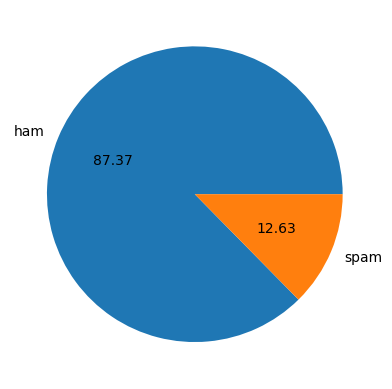

In [34]:
plt.pie(df1['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [35]:
import nltk

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
df1['num_characters']=df1['text'].apply(len)

C:\Users\rahul\AppData\Local\Temp\ipykernel_9168\1998808907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_characters']=df1['text'].apply(len)


In [38]:
df1.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [39]:
df1['word_length']=df1['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\rahul\AppData\Local\Temp\ipykernel_9168\2983822095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['word_length']=df1['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [40]:
df1['word_length']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: word_length, Length: 5169, dtype: int64

In [41]:
df1.head()

,target,text,num_characters,word_length
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [42]:
df1.rename(columns={'word_length':'num_words'})

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [43]:
df1.head()

,target,text,num_characters,word_length
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [44]:
df1['num_sentences']=df1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\rahul\AppData\Local\Temp\ipykernel_9168\2207892164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_sentences']=df1['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [45]:
df1

,target,text,num_characters,word_length,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [46]:
df1.rename(columns={'word_length':'num_sentences'})

,target,text,num_characters,num_sentences,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [47]:
df1

,target,text,num_characters,word_length,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [48]:
df1[df1['target'] == 0][['num_sentences','num_characters','word_length']].describe()

,num_sentences,num_characters,word_length
count,4516.000000,4516.000000,4516.000000
mean,1.799601,70.459256,17.120903
std,1.278465,56.358207,13.493725
min,1.000000,2.000000,1.000000
25%,1.000000,34.000000,8.000000
50%,1.000000,52.000000,13.000000
75%,2.000000,90.000000,22.000000
max,28.000000,910.000000,220.000000


In [49]:
df1[df1['target'] == 1][['num_sentences','num_characters','word_length']].describe()

,num_sentences,num_characters,word_length
count,653.000000,653.000000,653.000000
mean,2.967841,137.891271,27.667688
std,1.483201,30.137753,7.008418
min,1.000000,13.000000,2.000000
25%,2.000000,132.000000,25.000000
50%,3.000000,149.000000,29.000000
75%,4.000000,157.000000,32.000000
max,8.000000,224.000000,46.000000


In [50]:
import seaborn as sns

In [51]:
df1

,target,text,num_characters,word_length,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

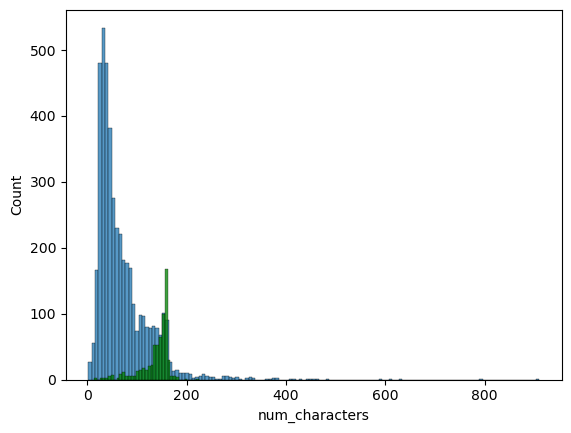

In [52]:
sns.histplot(df1[df1['target']==0]['num_characters'])
sns.histplot(df1[df1['target']==1]['num_characters'],color='green')

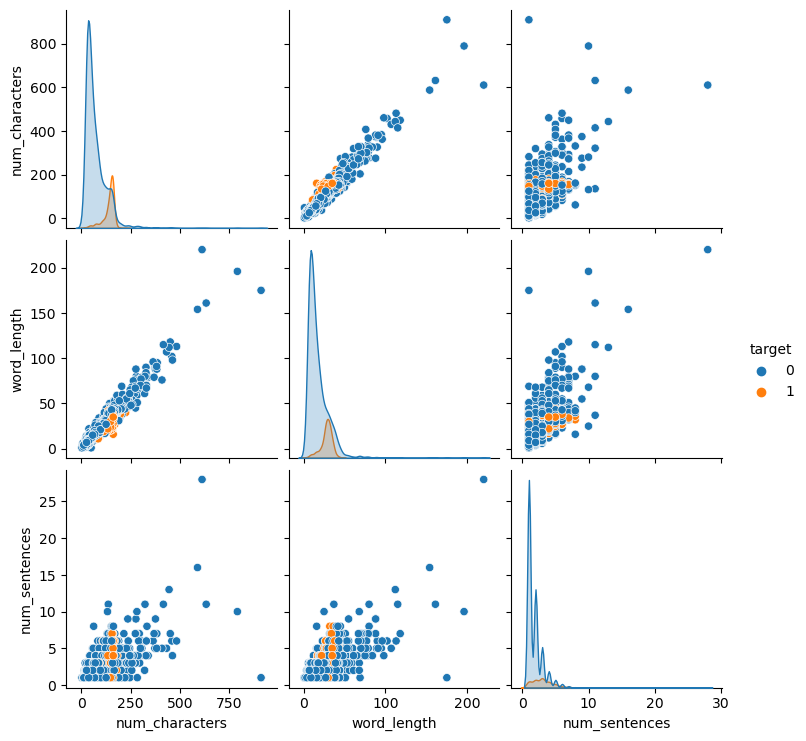

In [53]:
sns.pairplot(df1,hue='target')

<AxesSubplot:>

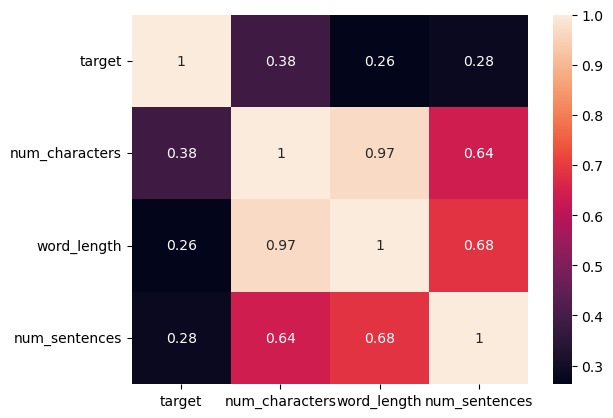

In [54]:
sns.heatmap(df1.corr(),annot=True)

In [82]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
import string  

In [86]:
def text_transform(text):
    text=text.lower()
    
    text=nltk.word_tokenize(text)
    
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    
    
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    
    for i in text:
        y.append(ps.stem(i));
    
    
    return " ".join(y)
    
    


In [88]:
text_transform("HI How are running You 34")

'hi run 34'

In [81]:
from nltk.stem.porter import PorterStemmer 
ps=PorterStemmer()
ps.stem('running')

'run'

In [90]:
df1['text_transformed']=df1['text'].apply(text_transform)

C:\Users\rahul\AppData\Local\Temp\ipykernel_9168\3454139736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text_transformed']=df1['text'].apply(text_transform)


In [91]:
df1.head()

,target,text,num_characters,word_length,num_sentences,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [94]:
pip install wordcloud

     ------------------------------------ 153.3/153.3 kB 339.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font=15,background='white')

In [104]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=15,background_color='white')

In [108]:
wc_spam=wc.generate(df1[df1['target']==1]['text_transformed'].str.cat(sep=""))

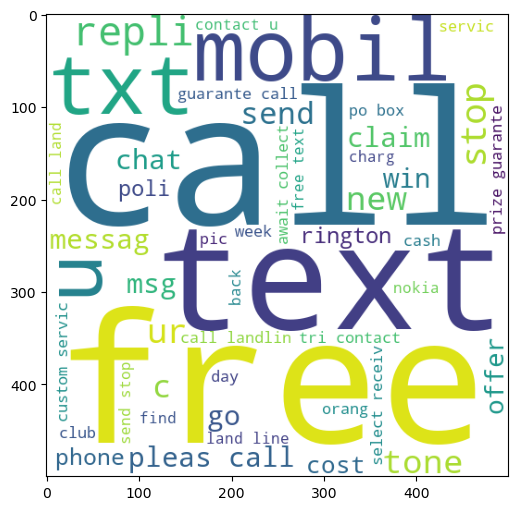

In [109]:
plt.figure(figsize=(15,6))
plt.imshow(wc_spam)

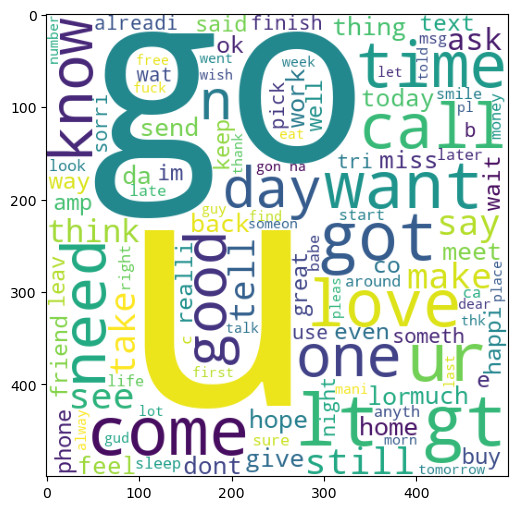

In [110]:
wc_spam=wc.generate(df1[df1['target']==0]['text_transformed'].str.cat(sep=""))
plt.figure(figsize=(15,6))
plt.imshow(wc_spam)

# Model Training


In [112]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(df1['text_transformed']).toarray()

In [113]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [116]:
y=df1['target'].values

In [117]:
y


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [125]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [126]:
gnb.fit(x_train,y_train)
predict1=gnb.predict(x_test)
print(accuracy_score(y_test,predict1))
print(precision_score(y_test,predict1))
print(confusion_matrix(y_test,predict1))

0.8800773694390716
0.5315315315315315
[[792 104]
 [ 20 118]]


In [127]:
mnb.fit(x_train,y_train)
predict2=mnb.predict(x_test)
print(accuracy_score(y_test,predict2))
print(precision_score(y_test,predict2))
print(confusion_matrix(y_test,predict2))

0.9642166344294004
0.8344370860927153
[[871  25]
 [ 12 126]]


In [128]:
bnb.fit(x_train,y_train)
predict3=bnb.predict(x_test)
print(accuracy_score(y_test,predict3))
print(precision_score(y_test,predict3))
print(confusion_matrix(y_test,predict3))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]
